In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

sys.path.insert(0, '../src')
from linear_regression import LinearRegression

In [3]:
seed = 42
rs = np.random.RandomState(seed)

In [4]:
def train_model(x, y, model, n_iters, batch_size):
    
    loss = []

    for i in tqdm(range(n_iters)):
        batch_idx = rs.randint(0, x.shape[0], size=batch_size)

        batch_x = x[batch_idx]
        batch_y = y[batch_idx]

        L = model.train(batch_x, batch_y)

        loss.append(L)
    return loss

In [5]:
size = 800
x = rs.normal(size=size)

k = 3
b = 1
y_clear = x * k + b

radius = 2
eps = rs.uniform(low=-radius, high=radius, size=size)
y = y_clear + eps

In [6]:
x_train, x_test, y_train, y_test, y_clear_train, y_clear_test = \
train_test_split(x, y, y_clear, random_state=seed)

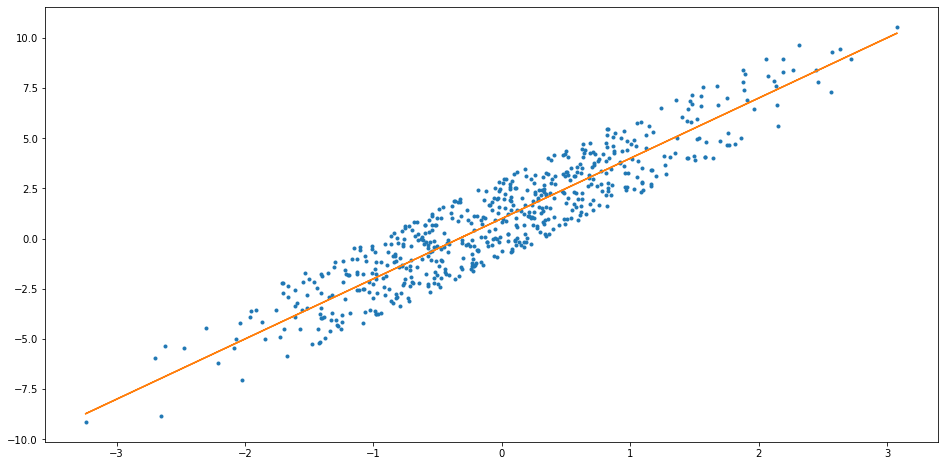

In [7]:
fig, axes = plt.subplots(figsize=(16,8))
axes.plot(x_train, y_train, '.')
axes.plot(x_train, y_clear_train)

In [8]:
model = LinearRegression(1, lr=1e-4)
loss = train_model(x_train, y_train, model, 1000, 32)

  0%|          | 0/1000 [00:00<?, ?it/s]

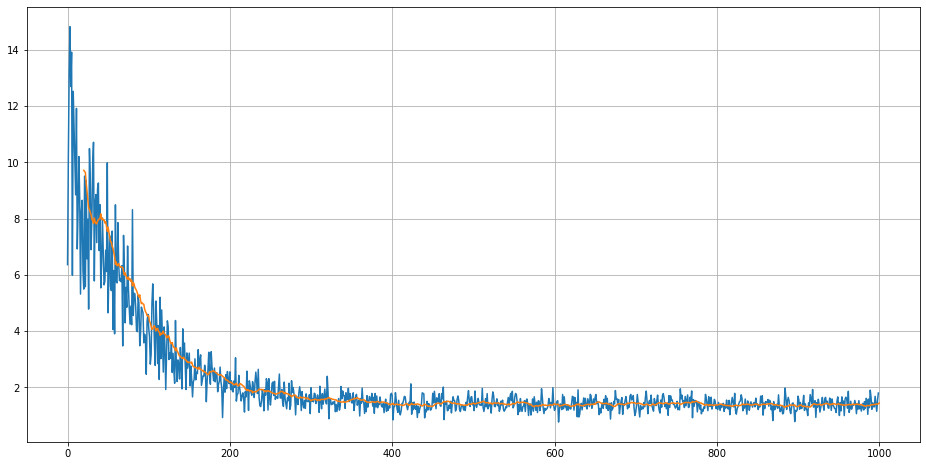

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(loss)

window = 20
averaged = np.convolve(loss, np.ones(window), 'valid') / window
ax.plot(np.arange(window, window + len(averaged)), averaged)

ax.grid()

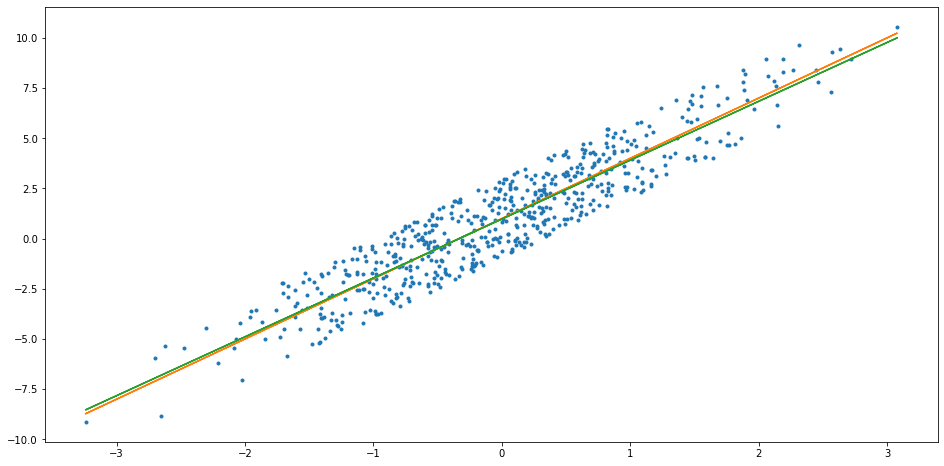

In [10]:
fig, axes = plt.subplots(figsize=(16,8))
axes.plot(x_train, y_train, '.')
axes.plot(x_train, y_clear_train)
axes.plot(x_train, model.forward(x_train.reshape(-1, 1))[0])

In [11]:
model_error = model.evaluate(x_test, y_test).squeeze()
data_error = model.loss(y_test, y_clear_test)

prec = 4
print(f"model error: {model_error:.{prec}f}")
print(f"data error: {data_error:.{prec}f}")

model error: 1.3936
data error: 1.3669
